In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
products=pd.read_csv('products.csv')
products.head()

,product_id,category,price,discount
0,P0001,Toys,458.33,0.20
1,P0002,Books,426.52,0.22
2,P0003,Home,230.23,0.06
3,P0004,Books,56.75,0.16
4,P0005,Books,191.70,0.21


In [3]:
sales=pd.read_csv('sales.csv')
sales.head()

,transaction_id,store_id,product_id,customer_id,date,quantity,revenue
0,T00001,S009,P0011,C00065,11-06-2023,2,276.68
1,T00002,S012,P0059,C00013,10-04-2023,3,480.20
2,T00003,S001,P0098,C00213,04-12-2023,2,385.04
3,T00004,S001,P0088,C00242,03-11-2023,2,497.32
4,T00005,S015,P0079,C00213,21-05-2023,4,550.45


In [4]:
marketing=pd.read_csv('marketing.csv')
marketing.head()

,region,week,TV,Online,Print
0,North,2023-01-01,3432,4904,3762
1,North,2023-01-08,7837,2449,1732
2,North,2023-01-15,5117,1677,3158
3,North,2023-01-22,3028,6327,4258
4,North,2023-01-29,6904,5624,2537


In [5]:
stores=pd.read_csv('stores.csv')
stores.head()

,store_id,region,manager,footfall
0,S001,South,Manager_1,2215
1,S002,West,Manager_2,4354
2,S003,East,Manager_3,2991
3,S004,East,Manager_4,3160
4,S005,East,Manager_5,3624


In [12]:
sales_products_df = pd.merge(sales, products, on='product_id', how='left')
sales_products_stores_df = pd.merge(sales_products_df, stores, on='store_id', how='left')
sales_products_stores_df['date'] = pd.to_datetime(sales_products_stores_df['date'], format='%d-%m-%Y')
sales_products_stores_df['key_1'] = sales_products_stores_df['date'].dt.to_period('W').dt.start_time
marketing['week'] = pd.to_datetime(marketing['week'])
marketing['key_1'] = marketing['week'].dt.to_period('W').dt.start_time
final_merged_df = pd.merge(sales_products_stores_df, marketing, on=['region', 'key_1'], how='left')

In [19]:
final_merged_df.head()

/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:57: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



,transaction_id,store_id,product_id,customer_id,date,quantity,revenue,category,price,discount,region,manager,footfall,key_1,week,TV,Online,Print
0,T00001,S009,P0011,C00065,2023-06-11,2,276.68,Toys,197.63,0.30,West,Manager_9,1491,2023-06-05,2023-06-11,9697,5517,3658
1,T00002,S012,P0059,C00013,2023-04-10,3,480.20,Toys,207.88,0.23,South,Manager_12,4965,2023-04-10,2023-04-16,1016,6182,4848
2,T00003,S001,P0098,C00213,2023-12-04,2,385.04,Clothing,204.81,0.06,South,Manager_1,2215,2023-12-04,2023-12-10,6300,7761,1631
3,T00004,S001,P0088,C00242,2023-11-03,2,497.32,Electronics,259.02,0.04,South,Manager_1,2215,2023-10-30,2023-11-05,6002,1886,840
4,T00005,S015,P0079,C00213,2023-05-21,4,550.45,Toys,191.13,0.28,South,Manager_15,2182,2023-05-15,2023-05-21,2094,7124,3695


In [20]:
df ["cost"]= final_merged_df["price"] * (60/100)

In [22]:
df.head()

,transaction_id,store_id,product_id,customer_id,date,quantity,revenue,category,price,discount,region,week,TV,Online,Print,key_1,manager,footfall,cost
0,T00001,S009,P0011,C00065,11-06-2023,2.0,276.68,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,118.578
1,T00002,S012,P0059,C00013,10-04-2023,3.0,480.20,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,124.728
2,T00003,S001,P0098,C00213,04-12-2023,2.0,385.04,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,122.886
3,T00004,S001,P0088,C00242,03-11-2023,2.0,497.32,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,155.412
4,T00005,S015,P0079,C00213,21-05-2023,4.0,550.45,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,114.678


In [23]:
df["profit"]= df["revenue"]- df["cost"]

In [24]:
df.head()

,transaction_id,store_id,product_id,customer_id,date,quantity,revenue,category,price,discount,region,week,TV,Online,Print,key_1,manager,footfall,cost,profit
0,T00001,S009,P0011,C00065,11-06-2023,2.0,276.68,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,118.578,158.102
1,T00002,S012,P0059,C00013,10-04-2023,3.0,480.20,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,124.728,355.472
2,T00003,S001,P0098,C00213,04-12-2023,2.0,385.04,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,122.886,262.154
3,T00004,S001,P0088,C00242,03-11-2023,2.0,497.32,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,155.412,341.908
4,T00005,S015,P0079,C00213,21-05-2023,4.0,550.45,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,114.678,435.772


In [25]:
monthly_sales = final_merged_df.groupby(['region', pd.Grouper(key='date', freq='M')])['revenue'].sum().reset_index()

fig = px.line(monthly_sales, x='date', y='revenue', color='region',
              title='Monthly Sales Trends Across Regions')
fig.update_xaxes(title_text='Month')
fig.update_yaxes(title_text='Total Revenue')
fig.show()

In [26]:
product_revenue = final_merged_df.groupby('product_id')['revenue'].sum().reset_index()

In [27]:
top_10_products = product_revenue.sort_values(by='revenue', ascending=False).head(10)
display(top_10_products)

,product_id,revenue
92,P0093,14510.46
1,P0002,13307.46
32,P0033,13057.50
96,P0097,12967.50
29,P0030,12456.08
43,P0044,12358.33
21,P0022,11959.20
67,P0068,11759.15
12,P0013,10960.23
5,P0006,10364.97


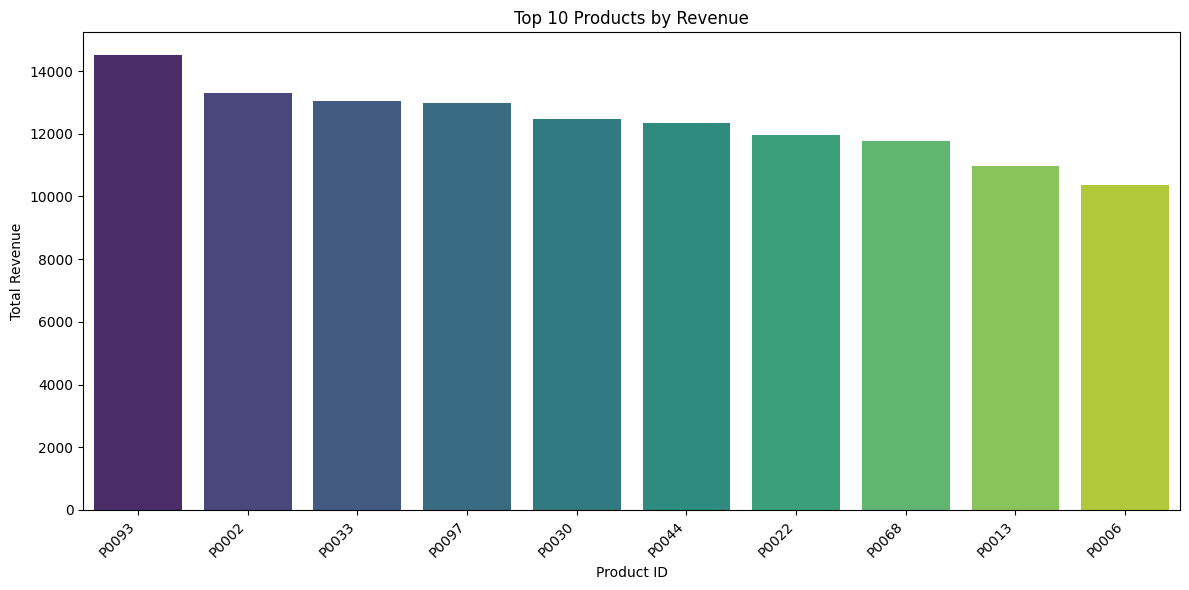

In [28]:
plt.figure(figsize=(12, 6))
sns.barplot(x='product_id', y='revenue', data=top_10_products, palette='viridis')
plt.title('Top 10 Products by Revenue')
plt.xlabel('Product ID')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [29]:
print(final_merged_df.columns)
print(final_merged_df[['category', 'revenue']].info())

Index(['transaction_id', 'store_id', 'product_id', 'customer_id', 'date',
       'quantity', 'revenue', 'category', 'price', 'discount', 'region',
       'manager', 'footfall', 'key_1', 'week', 'TV', 'Online', 'Print'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  1000 non-null   object 
 1   revenue   1000 non-null   float64
dtypes: float64(1), object(1)
memory usage: 15.8+ KB
None


**Reasoning**:
Generate a boxplot to visualize the distribution of revenue for each product category using the `final_merged_df` dataframe.



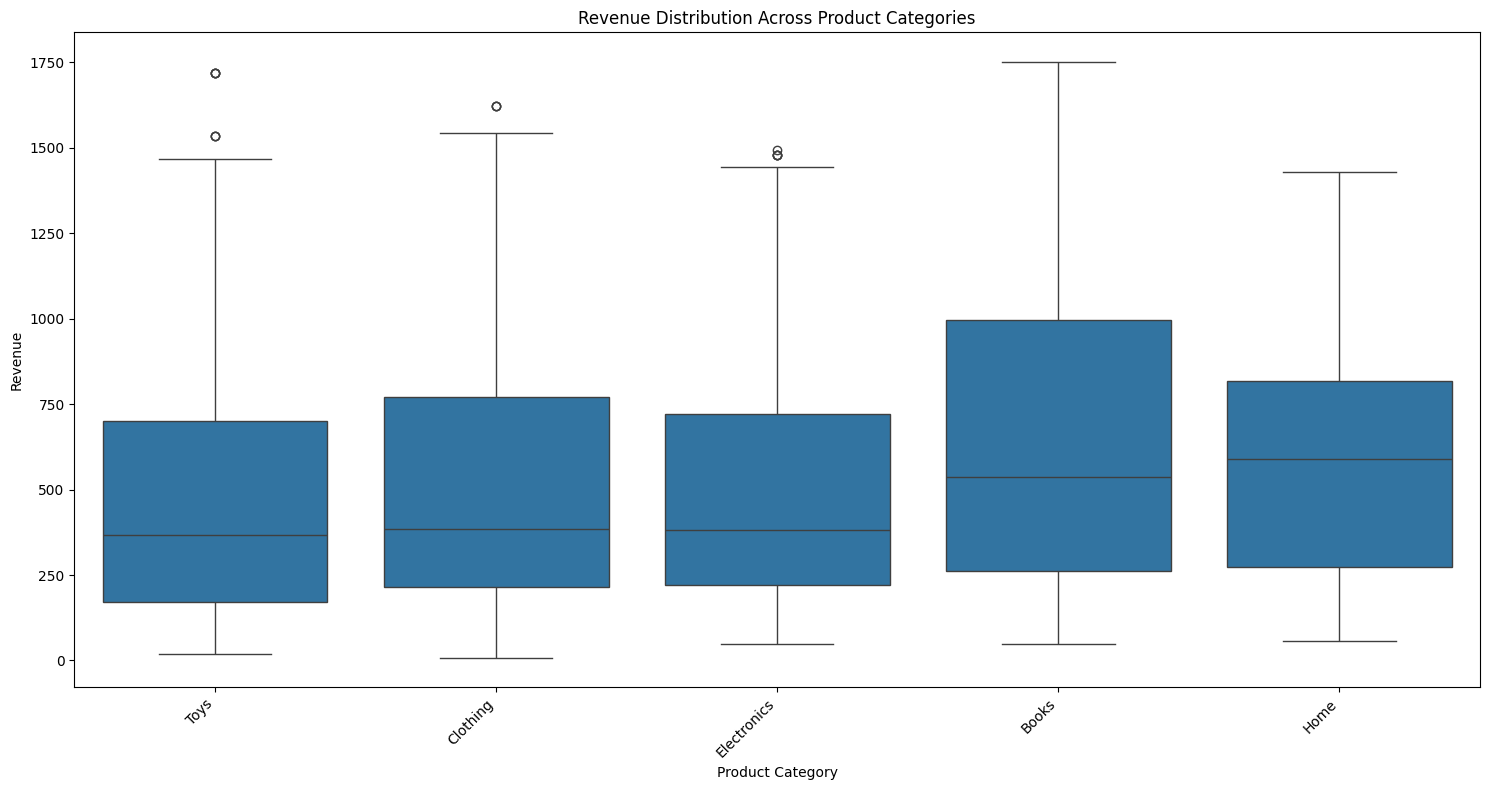

In [30]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='category', y='revenue', data=final_merged_df)
plt.title('Revenue Distribution Across Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [31]:
correlation_data = final_merged_df[['footfall', 'revenue', 'TV', 'Online', 'Print']]

In [32]:
correlation_matrix = correlation_data.corr()
display(correlation_matrix)

,footfall,revenue,TV,Online,Print
footfall,1.000000,-0.003898,0.019066,-0.022909,0.022506
revenue,-0.003898,1.000000,-0.022088,0.029206,0.045227
TV,0.019066,-0.022088,1.000000,0.041057,-0.158925
Online,-0.022909,0.029206,0.041057,1.000000,-0.045414
Print,0.022506,0.045227,-0.158925,-0.045414,1.000000


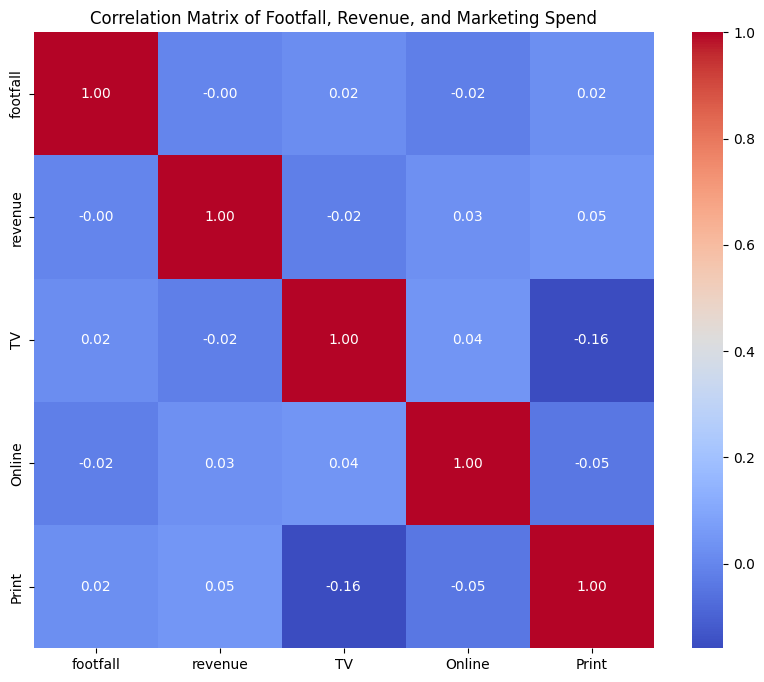

In [34]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Footfall, Revenue, and Marketing Spend')
plt.show()

In [35]:
numeric_df = final_merged_df.select_dtypes(include=np.number)
display(numeric_df.head())

,quantity,revenue,price,discount,footfall,TV,Online,Print
0,2,276.68,197.63,0.30,1491,9697,5517,3658
1,3,480.20,207.88,0.23,4965,1016,6182,4848
2,2,385.04,204.81,0.06,2215,6300,7761,1631
3,2,497.32,259.02,0.04,2215,6002,1886,840
4,4,550.45,191.13,0.28,2182,2094,7124,3695


In [36]:
correlation_matrix_all = numeric_df.corr()
display(correlation_matrix_all)

,quantity,revenue,price,discount,footfall,TV,Online,Print
quantity,1.000000,0.581510,-0.027373,0.051152,-0.017938,-0.020504,0.050705,0.033967
revenue,0.581510,1.000000,0.717123,-0.035942,-0.003898,-0.022088,0.029206,0.045227
price,-0.027373,0.717123,1.000000,0.093476,0.022761,-0.017978,0.010974,0.060572
discount,0.051152,-0.035942,0.093476,1.000000,-0.014638,-0.016112,-0.014509,0.053242
footfall,-0.017938,-0.003898,0.022761,-0.014638,1.000000,0.019066,-0.022909,0.022506
TV,-0.020504,-0.022088,-0.017978,-0.016112,0.019066,1.000000,0.041057,-0.158925
Online,0.050705,0.029206,0.010974,-0.014509,-0.022909,0.041057,1.000000,-0.045414
Print,0.033967,0.045227,0.060572,0.053242,0.022506,-0.158925,-0.045414,1.000000


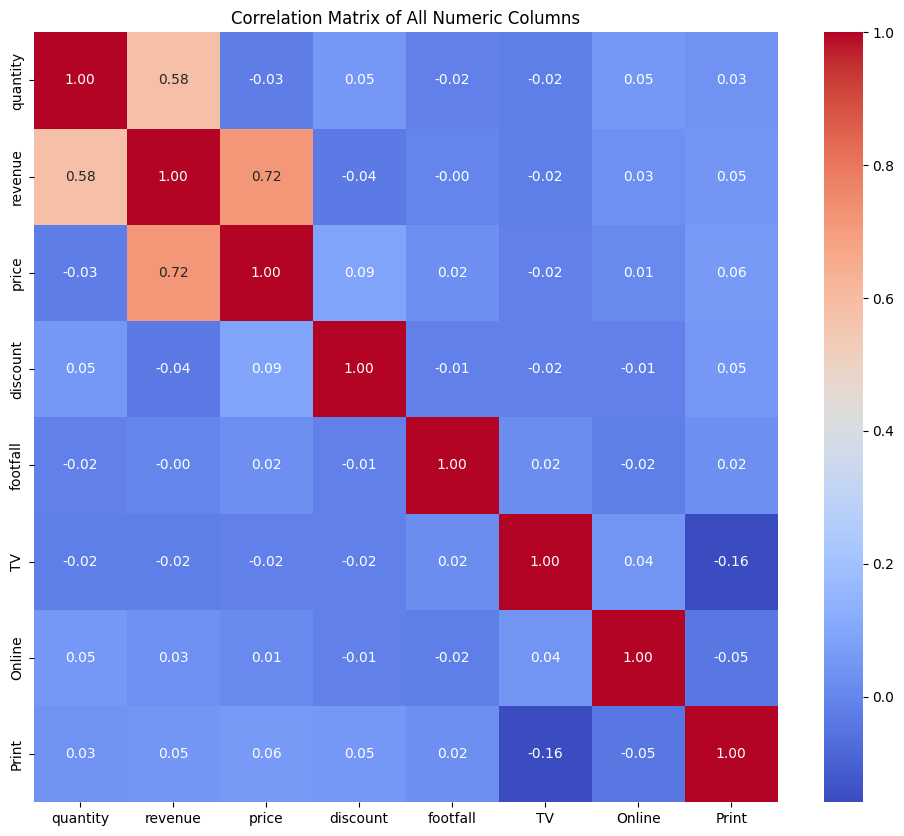

In [37]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_all, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of All Numeric Columns')
plt.show()